In [1]:
#IMPORTING THE NECESSARY LIBRARIES:
import pandas as pd
import numpy as np
import datetime
!pip install cryptocmd 
from cryptocmd import CmcScraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.7 MB/s eta 0:00:00


NOW THAT THE DATA IS CLEANED AND PREPROCESSED WE CAN PROCEED TO VISUALISATION AND PREDICTION MODELS


In [2]:
# Preprocessing the data
#IMPORTING THE DATA OF TEN YEARS 
import matplotlib.pyplot as plt
scraper = CmcScraper('BTC', '01-04-2013', '01-05-2023')
#CONVERTING INTO DATAFRAMES
data = scraper.get_dataframe()
data.sort_values(by='Date', ascending=True, inplace=True)


pd.set_option('display.max_columns', None)
display(data)
pd.reset_option('display.max_columns')
data['date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d %H:%M:%S')
data = data.loc[:, ['date', 'Open', 'Close', 'High', 'Low']]
data = data.rename({'Open': 'open', 'Close': 'close', 'High': 'high', 'Low': 'low'}, axis=1)
data_indexed = data.set_index('date')




,Date,Open,High,Low,Close,Volume,Market Cap
3655,2013-04-28,135.300003,135.979996,132.100006,134.210007,0.000000e+00,1.488567e+09
3654,2013-04-29,134.444000,147.488007,134.000000,144.539993,0.000000e+00,1.603769e+09
3653,2013-04-30,144.000000,146.929993,134.050003,139.000000,0.000000e+00,1.542813e+09
3652,2013-05-01,139.000000,139.889999,107.720001,116.989998,0.000000e+00,1.298955e+09
3651,2013-05-02,116.379997,125.599998,92.281898,105.209999,0.000000e+00,1.168517e+09
...,...,...,...,...,...,...,...
4,2023-04-27,28428.464279,29871.546352,28402.887387,29473.786184,2.715345e+10,5.705502e+11
3,2023-04-28,29481.013535,29572.791693,28929.608542,29340.262498,1.754446e+10,5.679930e+11
2,2023-04-29,29336.567035,29452.455245,29088.042336,29248.488373,1.066263e+10,5.662405e+11
1,2023-04-30,29245.515512,29952.028553,29114.021236,29268.807043,1.465220e+10,5.666613e+11


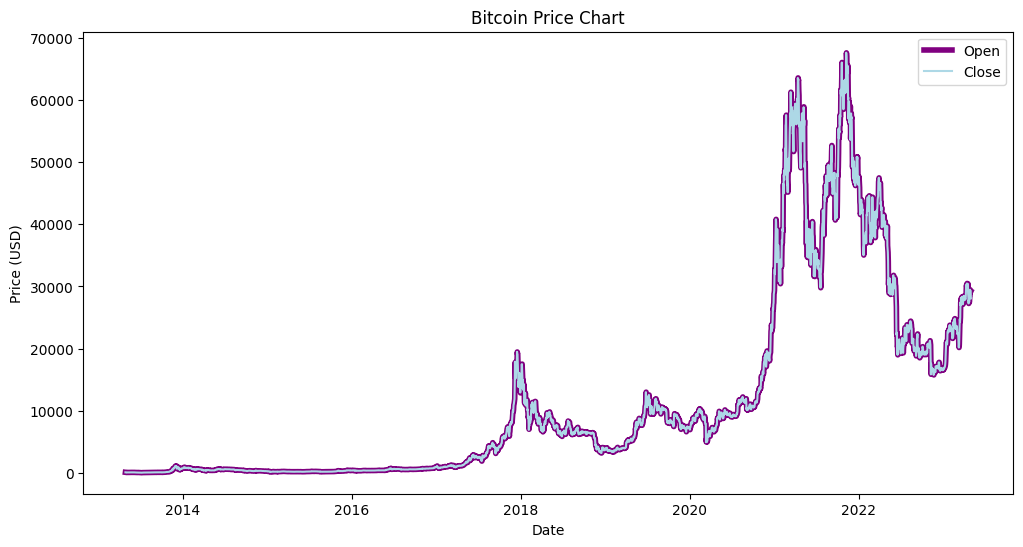

In [3]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the opening prices in blue
ax.plot(data_indexed.index, data_indexed['open'], color='purple',linewidth = 4, label='Open')

# Plot the closing prices in red
ax.plot(data_indexed.index, data_indexed['close'], color='lightblue', label='Close')

# Add title and axis labels
ax.set_title('Bitcoin Price Chart')
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')

# Add legend
ax.legend()

# Show the plot
plt.show()









RANDOM FOREST:

In [4]:
shifted_rows = 100
df = data_indexed
df['prediction'] = df[['close']].shift(-shifted_rows)
print(df['prediction'])

date
2013-04-28    106.750000
2013-04-29    106.750000
2013-04-30    103.000000
2013-05-01    102.800003
2013-05-02    103.000000
                 ...    
2023-04-27           NaN
2023-04-28           NaN
2023-04-29           NaN
2023-04-30           NaN
2023-05-01           NaN
Name: prediction, Length: 3656, dtype: float64


In [5]:
training_data = np.array(df[['close']][:-shifted_rows])
print(training_data)


y = (df['prediction'].values)[:-shifted_rows]
print(y)

[[  134.21000671]
 [  144.53999329]
 [  139.        ]
 ...
 [21086.79330484]
 [22676.55175889]
 [22777.62580913]]
[  106.75         106.75         103.         ... 29248.48837292
 29268.80704316 28091.56880389]


In [6]:

# Train and evaluate models
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Random Forest", RandomForestRegressor()),
    ("Support Vector Machine", SVR()),
    ("Multi-layer Perceptron", MLPRegressor())
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name}: R^2={r2:.4f}, MSE={mse:.4f}, MAE={mae:.4f}")

NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(training_data,y,test_size = 20)

In [ ]:
#LINEAR REGRESSION:
from sklearn.linear_model import LinearRegression

# Create a linear regression object
rf = RandomForestRegressor()
lr = LinearRegression()
rf.fit(x_train,y_train)
lr.fit(x_train,y_train)
rf_conf = rf.score(x_test,y_test)
lr_conf = lr.score(x_test,y_test)
print(lr_conf)
print(rf_conf)

In [ ]:
future_values = np.array(df[['close']][-shifted_rows:])
lr_pred = lr.predict(future_values)
rf_pred = rf.predict(future_values)

In [ ]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"{name}: R^2={r2:.4f}, MSE={mse:.4f}, MAE={mae:.4f}")

In [ ]:
plt.plot(future_values, 'red', label = 'Real price')
plt.plot(lr_pred, 'blue', label = 'Predicted_value')
plt.xlabel('Time Frame')
plt.ylabel('Price')
plt.title('BITCOIN PREDICTION USING LINEAR REGRESSION')
plt.legend()
plt.show()

In [ ]:
plt.plot(future_values, 'red', label = 'Real price')
plt.plot(rf_pred, 'blue', label = 'Predicted_value')
plt.xlabel('Time Frame')
plt.ylabel('Price')
plt.title('BITCOIN PREDICTION USING RANDOM FOREST REGRESSOR')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from cryptocmd import CmcScraper
from sklearn.utils import shuffle

scraper = CmcScraper('BTC', '01-04-2013', '01-05-2023')
#CONVERTING INTO DATAFRAMES
data = scraper.get_dataframe()
data.sort_values(by='Date', ascending=True, inplace=True)


pd.set_option('display.max_columns', None)
display(data)
pd.reset_option('display.max_columns')
data['date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d %H:%M:%S')
data = data.loc[:, ['date', 'Open', 'Close', 'High', 'Low']]
data = data.rename({'Open': 'open', 'Close': 'close', 'High': 'high', 'Low': 'low'}, axis=1)
data_indexed = data.set_index('date')
data = data_indexed

# Create features and target
data["Target"] = data["close"].shift(-1)
data.dropna(inplace=True)
X = data.drop("Target", axis=1)
y = data["Target"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Random Forest", RandomForestRegressor()),
    ("Multi-layer Perceptron", MLPRegressor())
]

X_train, y_train, = shuffle(X_train, y_train, random_state=42)
X_test, y_test, = shuffle(X_test, y_test, random_state=42)
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = model.score(X_test,y_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name}: ACCURACY={acc:.4f},R^2={r2:.4f}, MSE={mse:.4f}, MAE={mae:.4f}")
